In [5]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
d = pd.read_pickle('hourlies.pickle')

### Introduction

It was clear to me from the pairs plot that station pressure had clear clusters with all variables.  I suspect that is due to elevation, but I attempted to form clusters to get a sense of the gaps that correspond to different locations. 

In [28]:
station_press = d.loc[:, ['HOURLYStationPressure', 'ELEVATION']]

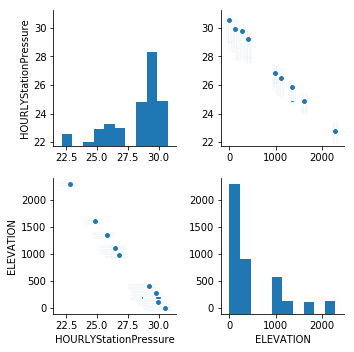

In [8]:
sns.pairplot(station_press)

In [9]:
#Try Kmeans
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3)

In [11]:
kmeans.fit(station_press)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

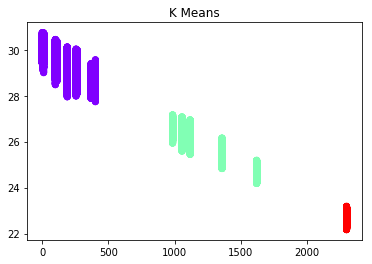

In [12]:
f, ax1 = plt.subplots()
ax1.set_title('K Means')
ax1.scatter(station_press['ELEVATION'],station_press['HOURLYStationPressure'],c=kmeans.labels_,cmap='rainbow')

In [29]:
station_press2 = d.loc[:, ['HOURLYStationPressure', 'HOURLYDRYBULBTEMPF']]

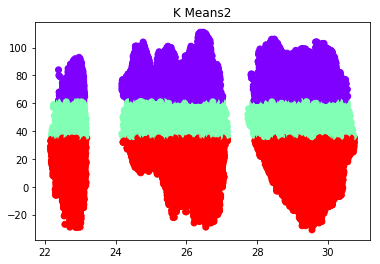

In [15]:
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(station_press2)
f, ax1 = plt.subplots()
ax1.set_title('K Means2')
ax1.scatter(station_press2['HOURLYStationPressure'],station_press2['HOURLYDRYBULBTEMPF'],c=kmeans2.labels_,cmap='rainbow')

## Kmeans Results

A K-means with temperature picked up an idea of boundaries instead of clusters.  I suspect
that the clusters are not globular enough to form accurate centroids.  Let's try another clustering method, a Guassian Mixture, that deals with density a little bit better.

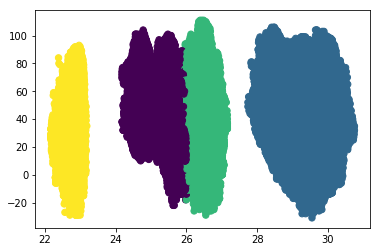

In [16]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, covariance_type = 'full').fit(station_press2)
labels = gmm.predict(station_press2)
plt.scatter(station_press2['HOURLYStationPressure'],station_press2['HOURLYDRYBULBTEMPF'], c=labels, s=40, cmap='viridis');

In [43]:
#This looks a little bit strange, but it's still better
#see if we can figure out the optimal number of components by the AIC mearsure, looks like 4 is ok
n_components = np.arange(1,10)
models = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(station_press2)
         for n in n_components]

Text(0.5,0,'n_components')

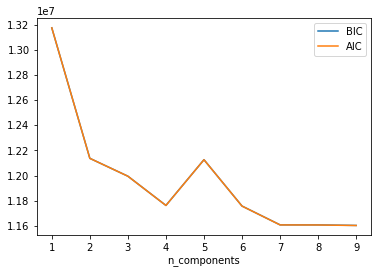

In [44]:
plt.plot(n_components, [m.aic(station_press2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

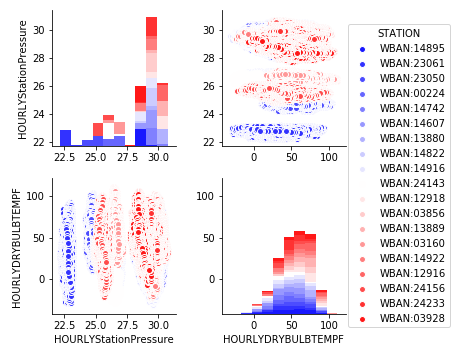

In [34]:
sns.pairplot(d.loc[:, ['STATION', 'HOURLYStationPressure', 'HOURLYDRYBULBTEMPF']], hue = 'STATION', palette='bwr')

## Conclusion

Kmeans performed poorly when attempting to cluster the groups by gaps.  The Gausian Mixture performed bettter, and from the last plot it appears that the clusters are indeed forming as a result of some specifics of the geographical location, most likely elevation.  This result was a bit uninteresting but I was happy to at least grasp some of the present clustering.